# Deep Learning - Exercise 1
In this lecture, we'll explore essential TensorFlow 2 and Keras concepts through hands-on examples with the MNIST dataset - the "Hello World" of deep learning. We'll cover:

**Core Concepts**
- 🚀 Building and training a basic neural network for digit classification
- 📒 Understanding validation strategies for model evaluation
- 📊 Exploring model complexity and its impact on performance
- ✅ Designing optimal architectures using fully connected layers

![meme01](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/dl_meme_01.jpg?raw=true "AI Meme")

[Open in Google colab](https://colab.research.google.com/github/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/dl_01.ipynb)

[Download from Github](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/dl_01.ipynb)

##### Remember to set **GPU** runtime in Colab!

### Import of the TensorFlow
The main version of the TensorFlow (TF) is a in the Version package in the field VERSION
Since the TensformFlow 2.0 everything was encapsulaed under the KERAS api.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

tf.version.VERSION

'2.18.0'

# Import a dataset
* Datasets are stored in the keras.datasets submodule. Few testing datasets are stored here and installed together with the TF package

In [2]:
# mnist is the basic dataset with handwritten digits
mnist = tf.keras.datasets.mnist

# data from any dataset are loaded using the load_Data function
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# the data are in the form of 28x28 pixes with values 0-255.
print('Train data shape: ', x_train.shape)
print('Test data shape:  ', x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train data shape:  (60000, 28, 28)
Test data shape:   (10000, 28, 28)


* The dataset consists of 60,000 training images and 10,000 testing images. All of the are 28x28 pixels. 

## Let's take look on the data
* 💡 Look closely on the value scale - it is from 0 to 255 as usual in grayscale images.

## We can see that the numbers are already centered - you won't see this feature in the real world images often 🙂
* Some of the images are quite easy to classify but on the other hand there is a lot of noise in the data as well.

**Example Analysis**
- Some digits exhibit characteristics of multiple classes
- **Sample 1**: Clear, well-defined digit with distinct features
- **Sample 2**: Ambiguous sample showing characteristics of both "1" and "7"
    - Missing the horizontal stroke typical of "7"
    - Slight angle resembling a slanted "1"

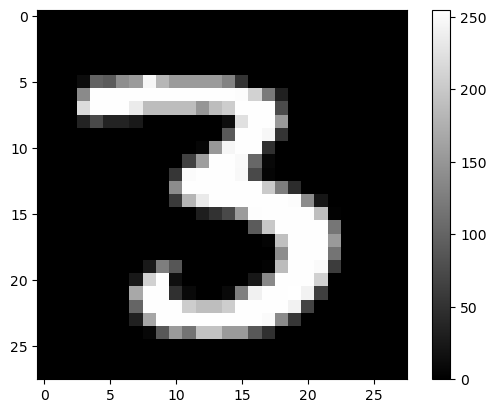

In [3]:
plt.figure()
plt.imshow(x_train[12], cmap='gray', vmin = 0, vmax = 255)
plt.colorbar()
plt.grid(False)
plt.show()

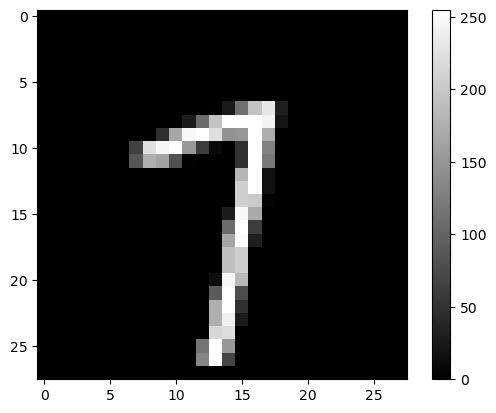

In [4]:
plt.figure()
plt.imshow(x_train[42], cmap='gray', vmin = 0, vmax = 255)
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
y_train[42]

7

## Normalizing Pixel Values

- Convert pixel values from 0-255 to \(0,1\) by dividing each value by 255.
- **🔎 Why Normalize?**
  - Smaller input values stabilize gradient updates.
  - Consistent input scale improves the adjustment of network weights.

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Make better visualization of the data to better understand how complex they are
* You can see that "noisy" digit and different handwriting style is really no exception

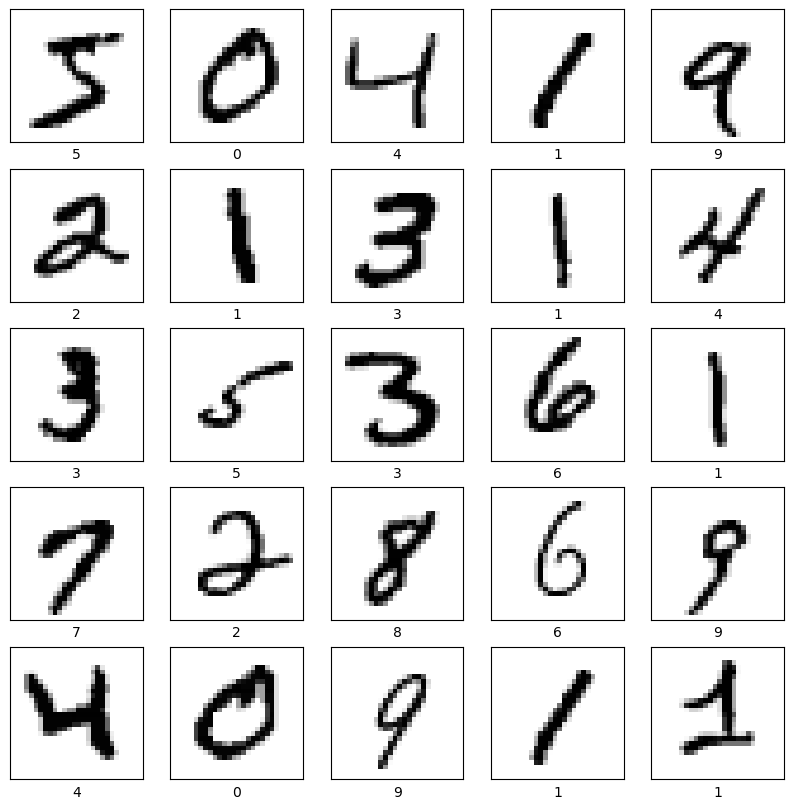

In [7]:
class_names = [str(x) for x in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 🌳 Before we dive in the deep learning territory, let's try to create some baseline model using a machine learning so we can compare the approaches
* 🔎 Are ML models capable of processing image data?
    * How to deal with a matrix input?

In [8]:
alg = DecisionTreeClassifier()
alg.fit(x_train.reshape(-1, 28*28), y_train)

DecisionTreeClassifier()

In [9]:
y_pred = alg.predict(x_test.reshape(-1, 28*28))

In [10]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8759

# We can see that we were able to create a classifier very easily.
* 💡 However it is no secret, that DL models accuracy on MNIST can be >= 98% even with simple architecture
    * Given the fact, our result is not very impresive 🙂

# Basic model - ANN with very simple hierarchy
   * Model is created using layers, many layers exists in the [layer submodule](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
   * Each layer uses a activation functions collected in the [module nn](https://www.tensorflow.org/api_docs/python/tf/nn)
 
### 💡 There are 2 ways of using the Keras API - **Sequential** and **Functional**
   * We will start with the sequential one

* 🔎 Why do we use activation functions?
* 🔎 How is ANN different from lin. regression?

# 🚀 Let's design our first ANN
   * Can you draw such network on a table?

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# Flatten module flatten the multidimension input into single vector 28x28 = 784 float numbers
    keras.layers.Dense(32, activation=tf.nn.relu), # standard dense-fully connected layer with the rectified lineaar function as an activation
    keras.layers.Dense(10, activation=tf.nn.softmax), # another fully-connected layer with softmax activation function
])

model.summary() # prints the summary of the model

C:\Users\BoushiPC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

### 🔎 What is the meaning of the *Total params* number?

# 📒 Model Compilation

Each model must be compiled to fit the data and predict labels.

## ⚙️ Optimizers

- A variety of optimizers are available, many based on gradient descent, with gradient-free options (e.g., [Nevergrad by META](https://github.com/facebookresearch/nevergrad)).

### 🔑 Selected Optimizers

- **📉 Gradient Descent**  
  Uses the full dataset; not ideal for large datasets.
  
- **🎲 Stochastic Gradient Descent (SGD)**  
  Estimates the gradient using a subset of data.
  
- **📊 RMSProp**  
  Adapts the learning rate using the running average of recent gradients.
  
- **⚡ ADAM**  
  Combines gradient average and second moment to adapt the learning rate.

## 🧮 Loss Functions

💡 *Training aims to optimize weights by minimizing a loss function. The choice depends on the task and network architecture.*

- **📐 Mean Squared Error (MSE)** – For regression tasks (logarithmic variant available).
- **📏 Mean Absolute Error (MAE)** – Uses absolute differences instead of squared values.
- **🔢 Binary Cross-Entropy** – For binary tasks; requires a sigmoid activation function.
- **🌈 Categorical Cross-Entropy** – For multi-class tasks; requires softmax and one-hot encoded labels.
- **🌟 Sparse Categorical Cross-Entropy** – Similar to categorical loss but works with integer labels.

## 📊 Metrics

💡 *Metrics evaluate model performance. Choose metrics based on the task and label distribution.*

### 📈 Regression Metrics
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)

### 🧩 Classification Metrics
- Binary Accuracy
- Categorical Accuracy
- Sparse Categorical Accuracy
- Top-k Categorical Accuracy
- Sparse Top-k Categorical Accuracy

⚡ *Remember*: Accuracy may not always be the best metric, especially for imbalanced datasets. Consider alternatives like F1-score or recall in such cases.


# 🚀 Model Compilation

- **Accuracy Metric:** We evaluate our model using the accuracy metric.
- **Loss Function:** We use `SparseCategoricalCrossentropy` because our labels are provided as integers.

## Dense Layer Output Options

- **Probabilities:**  
  The output is passed through a softmax function, producing a normalized probability distribution over the classes (sums to 1).
  
- **Logits:**  
  The layer produces raw activations, which are not normalized.

## Configuring `from_logits`

Your loss function needs to know what kind of output to expect:
- 💡 If the output layer uses a **softmax** activation, set `from_logits` to `False`.
- 💡 If the output layer does **not** use softmax, set `from_logits` to `True`.

In [13]:
model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

## 📊 Model visualization
* The model may be printed into image like the following image of our model:

In [14]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


# 🚀 Now we can fit the model to the input data
* The `fit()` method fit the model to the data, the parameters are *data* and *labels* from the train set and number of *epoch* to be trained.
* The `validation_split` parameter is also very common. What does the parameter do?
    * What is the validation set? How is it different from the test set?

## FAQ section 🙂
* How does the ANN training procedure look like?
* What is the *epoch*?
* What is the *batch*?
* Why do we use batches? 
    * Is possible to have batch of size `len(data)` or of size `1`? 
    * What are caveates of these cases?

# Define the callbacks
* 💡  Always use `ModelCheckpoint` callback so you overcome the possible overfitting in the last few epochs!

## The `.fit()` API is pretty powerful
* It is common to use some sort of a callback, we will use `ModelCheckpoint` callback which saves the best weights configuration obtained during training so the overfitting at the final phase of training will be suppressed

* **💡 The best weights are determined using the validation loss value**

In [15]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

# Fit the model

In [16]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.7031 - loss: 1.0530 - val_accuracy: 0.9193 - val_loss: 0.2947
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.9226 - loss: 0.2833 - val_accuracy: 0.9383 - val_loss: 0.2266
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.9389 - loss: 0.2179 - val_accuracy: 0.9450 - val_loss: 0.1975


# 📈 Plot Analysis: Accuracy and Loss
The plot displays both training and validation trends, with accuracy increasing and loss decreasing over epochs.

- **Lower Loss & Higher Accuracy:**  
  It's normal for the loss to decrease and accuracy to increase during training, which indicates that the model is learning. Occasional fluctuations—where the loss may spike briefly—are also common due to the stochastic nature of optimization.

- **Loss Function Behavior:**  
  The loss can sometimes increase in short intervals because of noise in the training process, but overall a downward trend is desired.

- **Overfitting Indicator:**  
  If the training loss continues to decrease while the validation loss starts increasing, this situation is known as **overfitting**. Overfitting occurs when the model learns the training data too well and fails to generalize to unseen data.

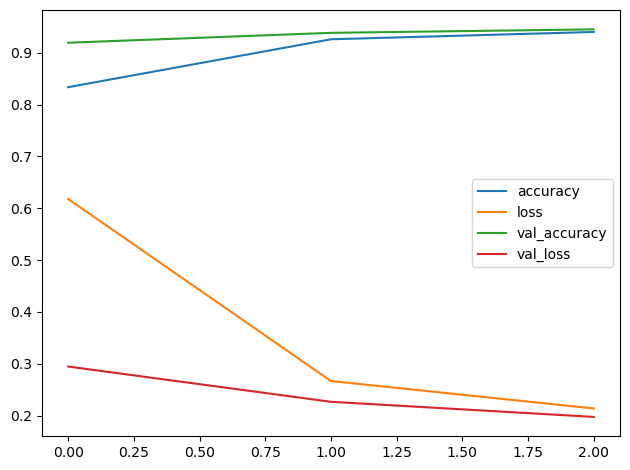

In [17]:
plt.figure()
for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
plt.legend()
plt.tight_layout()

# 📌 Beware that ANNs are prone to overfitting!

### How does overfit look like?
* Y axis = Accuracy
* X axis = Epoch

![overfit](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/overfit_acc.png?raw=true "Overfit")

# 🔎 How can we solve the overfitting issue?

## 1 - Use simpler model
* The model often overfit because there is a lot of parameters for the amount of input data

## 2 - Use Dropout layer
* Node sampling instead of edge sampling 
* If a node is dropped, then all incoming and outgoing connections from that node need to be dropped as well
* We sample sub-networks from the original one - basically ensemble of networks
* There won't be some "alpha" node in the individual layer with huge weight coefficient
    * Responsibility for prediction will be shared among multiple nodes

![dropout](https://github.com/rasvob/2020-21-ARD/raw/master/images/dropout.jpeg "Dropout")

## 💡 Keras API
- `keras.layers.Dropout(0.5)`
- Take a look [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

## Beware that the best weights needs to be loaded after the training is finished!
* **💡 Otherwise you use the weights from the last epoch!**

In [18]:
model.load_weights("best.weights.h5")

## Now we can use *evaluate()* function for obtaining the accuracy using the test set

![meme02](https://github.com/rasvob/VSB-FEI-Deep-Learning-Exercises/blob/main/images/dl_meme_02.jpg?raw=true "AI Meme 02")

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9349 - loss: 0.2191
Test accuracy:  0.9440000057220459


# Can we obtain the labels and use it for our own evaluation without Keras? Sure!

## We will obtain the raw softmax outputs
* 🔎 What is the range of the vector values?
* 🔎 Do they sum-up to some number?

In [20]:
y_pred_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


In [21]:
y_pred_proba[0]

array([7.7770937e-06, 6.5662292e-08, 4.6189361e-05, 5.5002994e-03,
       2.7035233e-07, 8.8419118e-05, 1.3544553e-07, 9.9357313e-01,
       8.4728872e-06, 7.7515590e-04], dtype=float32)

In [22]:
np.sum(y_pred_proba[0])

0.9999999

## Now we can extract the index of the highest probability and get the labels

In [23]:
y_pred = np.argmax(y_pred_proba, axis=1)

In [24]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Is the model any better than the ML baseline?

In [25]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.944

# We can now re-build the same network using a Functional API
* You can use any API that you like however I recommend the **Functional** one as it is more versatile in advanced use-cases, e.g. building ANN architecture with skip-connect synaptic links

In [26]:
ann_input = keras.layers.Input(shape=(28, 28))
flatten = keras.layers.Flatten()(ann_input)
hidden = keras.layers.Dense(32, activation='relu')(flatten)
ann_output = keras.layers.Dense(10, activation='softmax')(hidden)

model = keras.Model(ann_input, ann_output)

model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

## ⚡ The rest of the training process is the same

In [27]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)
model.load_weights("best.weights.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.7208 - loss: 0.9659 - val_accuracy: 0.9213 - val_loss: 0.2832
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9202 - loss: 0.2865 - val_accuracy: 0.9357 - val_loss: 0.2306
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9332 - loss: 0.2352 - val_accuracy: 0.9449 - val_loss: 0.1982
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.9330 - loss: 0.2363
Test accuracy:  0.9422000050544739


# Inference and Deployment

- **Save the Model:**  
  📌 Once training is complete, save your model to a file. This avoids retraining every time you need to make predictions.

- **Load the Model for Inference:**  
  📂 In your web app, load the saved model and use it to process incoming data and generate predictions.

## Save the model
* We are using the new `.keras` format

In [28]:
model.save('mnist_model.keras')

## Load the model back to memory and test it

In [29]:
loaded_model = keras.models.load_model('mnist_model.keras')
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9330 - loss: 0.2363
Test accuracy:  0.9422000050544739


# ✅ Task (2p)
1) Experiment with batch_sizes, use these two settings and compare the results (📌 Compare training time and accuracy) - **(0.5p)**

    1) Use batch_size=1 -> Accuracy: 0.956, training time was really long -> 1m 24s

    2) Use batch_size=1024 -> Accuracy: 0.961, training time short -> 0.6s
    
2) Add `Dropout` layer just before the `SoftMax` output layer in you architecture use these two settings and compare the results (📌 Take a look at the train and val accuracy) - **(0.5p)**

    1) Dropout(0.2) -> Dropout layer visibly decreased accuracy of both train and val datasets, but train accuracy started significantly lower, hinting at underfitting, but generalizing well.
    
    2) Dropout(0.95) -> This dropout is too significant, both underfitting the train dataset but not generalizing well either. 
    Both dropout layers lowered final test accuracy in this case, but we protected ourselves from possible overfitting and ensured good generalization. 
    
3) Define your own architecture using either one of the showed API and try to beat the basic model - **(1p)**
- I added convolutional ann in front of basic model as its very effective for images prediction.  
- Its final accuracy was 0.988  
  
model = keras.Sequential([  
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  
    keras.layers.MaxPooling2D((2, 2)),  
    keras.layers.Conv2D(64, (3, 3), activation='relu'),  
    keras.layers.MaxPooling2D((2, 2)),  
    keras.layers.Flatten(),  
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')  
])  

In [30]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=1)
model.load_weights("best.weights.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

Epoch 1/3
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 29s 606us/step - accuracy: 0.9191 - loss: 0.2708 - val_accuracy: 0.9440 - val_loss: 0.2055
Epoch 2/3
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 29s 597us/step - accuracy: 0.9543 - loss: 0.1570 - val_accuracy: 0.9523 - val_loss: 0.1779
Epoch 3/3
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 26s 552us/step - accuracy: 0.9608 - loss: 0.1361 - val_accuracy: 0.9503 - val_loss: 0.1940
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9464 - loss: 0.2075
Test accuracy:  0.9560999870300293


In [31]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=1024)
model.load_weights("best.weights.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9634 - loss: 0.1260 - val_accuracy: 0.9543 - val_loss: 0.1667
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.1127 - val_accuracy: 0.9567 - val_loss: 0.1551
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.1066 - val_accuracy: 0.9590 - val_loss: 0.1489
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.9521 - loss: 0.1770
Test accuracy:  0.9611999988555908


In [ ]:
ann_input = keras.layers.Input(shape=(28, 28))
flatten = keras.layers.Flatten()(ann_input)
hidden = keras.layers.Dense(32, activation='relu')(flatten)
dropout1 = keras.layers.Dropout(0.2)(hidden)
ann_output = keras.layers.Dense(10, activation='softmax')(dropout1)

model = keras.Model(ann_input, ann_output)

model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=1024)
model.load_weights("best.weights.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3921 - loss: 1.8548 - val_accuracy: 0.8474 - val_loss: 0.7060
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7834 - loss: 0.7573 - val_accuracy: 0.8899 - val_loss: 0.4419
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.5523 - val_accuracy: 0.9050 - val_loss: 0.3624
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8919 - loss: 0.4162
Test accuracy:  0.9071000218391418


In [34]:
ann_input = keras.layers.Input(shape=(28, 28))
flatten = keras.layers.Flatten()(ann_input)
hidden = keras.layers.Dense(32, activation='relu')(flatten)
dropout2 = keras.layers.Dropout(0.95)(hidden)
ann_output = keras.layers.Dense(10, activation='softmax')(dropout2)

model = keras.Model(ann_input, ann_output)

model.compile(optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    )

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=1024)
model.load_weights("best.weights.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1080 - loss: 2.5175 - val_accuracy: 0.3719 - val_loss: 2.1124
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1292 - loss: 2.2193 - val_accuracy: 0.5095 - val_loss: 1.9493
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1454 - loss: 2.1719 - val_accuracy: 0.6250 - val_loss: 1.8158
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6019 - loss: 1.8442
Test accuracy:  0.6220999956130981


In [38]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

C:\Users\BoushiPC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best.weights.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=[model_checkpoint_callback], batch_size=128)
model.load_weights("best.weights.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9700 - loss: 0.1007 - val_accuracy: 0.9810 - val_loss: 0.0615
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9838 - loss: 0.0550 - val_accuracy: 0.9846 - val_loss: 0.0557
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9858 - loss: 0.0427 - val_accuracy: 0.9870 - val_loss: 0.0423
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9849 - loss: 0.0441
Test accuracy:  0.9882000088691711
